# A Graphische Datenanalyse

Wir betrachten verschiedene Darstellungsmöglichkeiten einer Stichprobe $X=(X_1 ,\ldots ,X_n)$, und erinnern uns an relevante Statistiken:
- Stichprobenmittelwert $\quad M(X)=\sum_{i=1}^n X_i$
- Stichprobenvarianz $\quad V(X)=\sum_{i=1}^n (X_i -M(X))^2$
- Empirische Verteilungsfunktion $\quad F_n (x)=\sum_{i=1}^n \mathbb{1}_{(-\infty ,x]} (X_i )$
- Empirische Quantile $\quad q_{n,\alpha } =q_\alpha (F_n )=\inf\{ x\in\mathbb{R} :F_n (x)\geq\alpha\}$



In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pylab
import math

## Boxplot
Ein **Boxplot** oder **Kastendiagramm** fasst die wesentlichen Quantile eines Datensatzes zusammen. Die Box entspricht immer dem Bereich in dem die zentralen 50% der Datenpunkte liegen und die mittlere Linie ist der Median. Die "Whisker" sind nicht eindeutig definiert, sie können dem maximalen und minimalen Datenpunkten entsprechen, aber meistens (wie unten) entsprechen sie dem 1.5 fachen Abstand des Quartils vom Median, und Datenpunkte außerhalb werden als Ausreißer separat dargestellt.

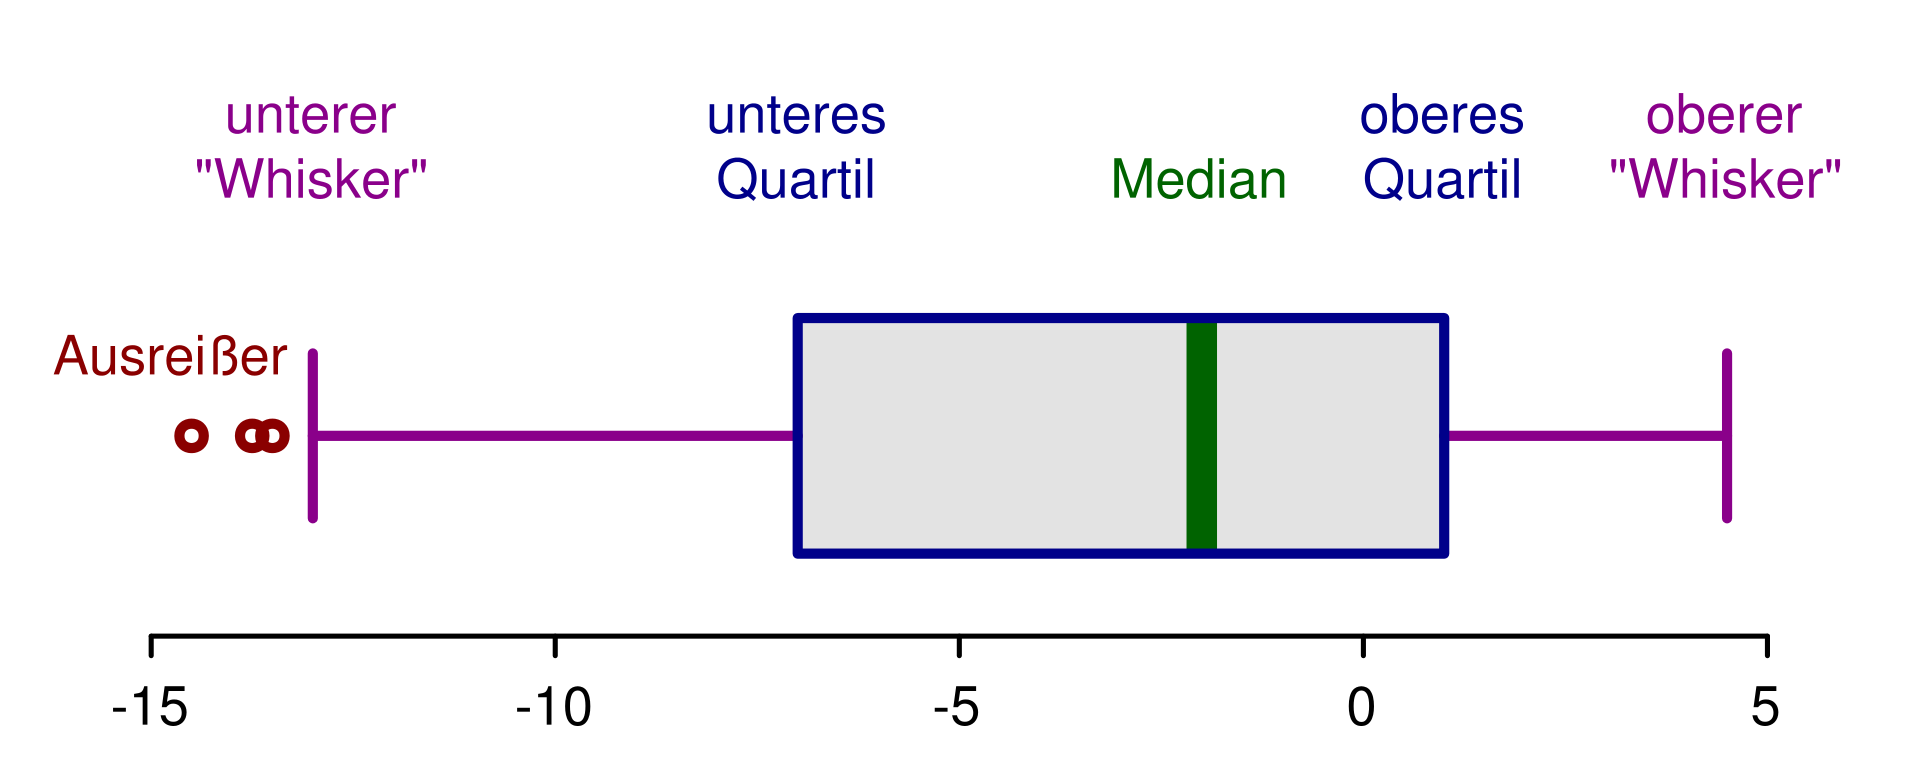

In [182]:
from IPython.display import Image
Image("boxplot.png",width="500")

In [185]:
data=np.random.normal(1,2,100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7859465f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d785946cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d785946208>],
 'medians': [<matplotlib.lines.Line2D at 0x1d78594f3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d78594f710>],
 'means': []}

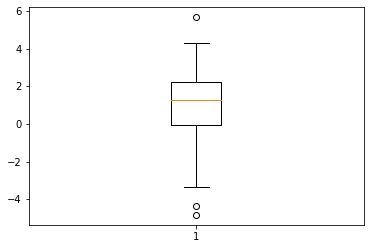

In [186]:
plt.boxplot(data)

## Empirische Verteilungsfunktion

In [47]:
from statsmodels.distributions.empirical_distribution import ECDF

Text(0, 0.5, '$F_n (x)$')

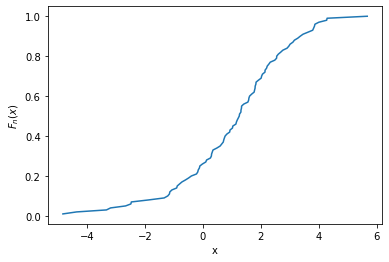

In [187]:
plt.plot(ECDF(data).x,ECDF(data).y)

plt.xlabel('x')
plt.ylabel('$F_n (x)$')

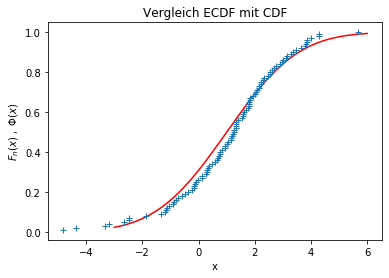

In [188]:
#define x and y values to use for CDF
x = np.linspace(-3, 6, 500)
y = ss.norm.cdf((x-1)/2)

#plot normal CDF
plt.plot(x, y, color='red')
plt.title('Vergleich ECDF mit CDF')
plt.xlabel('x')
plt.ylabel('$F_n (x)\ ,\ \Phi (x)$')

plt.plot(ECDF(data).x,ECDF(data).y,"+")

## Quantil-Quantil-Diagramm (Q-Q-Plot)
In einem **Q-Q-Diagramm** werden die geordneten Datenpunkte auf der $y$-Achse gegen die Quantile einer Verteilung "dist" auf der $x$-Achse aufgetragen. Stammt die Stichprobe aus der Verteilung "dist", dann liegen die Punkte nahe der Diagonalen.

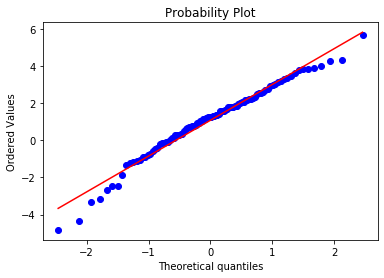

In [191]:
ss.probplot(data, dist="norm", plot=pylab)
pylab.show()

Um graphisch zu veranschaulichen, ob zwei Stichproben von der gleichen Verteilung stammen, kann man die empirischen Quantile gegeneinander auftragen und so miteinander vergleichen. Am einfachsten ist dies, wenn die Stichproben die gleiche Größe haben, dann trägt man einfach die Ordnungsstatistiken gegeneinander auf. Liegen die Punkte nahe der Diagonalen (oder einer Geraden), deutet dies darauf hin, dass die Daten aus der gleichen Verteilung (oder einer linearen Transformation) stammen.

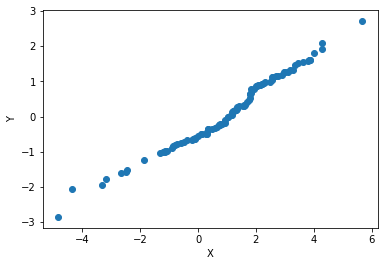

In [192]:
data2=np.random.normal(0,1,100)
#data2=np.random.exponential(1,100)

# Quantile-quantile plot
plt.figure()
plt.scatter(np.sort(data), np.sort(data2))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.close()

## Empirischer "Schwanz"
Für positive Daten die möglicherweise exponentiell oder nach einem Potenzgesetz verteilt sind, bietet es sich an den Schwanz der Verteilungsfunktion $1-F_n (x)$ mit logarithmierten Axen aufzutragen.

In [197]:
data3=np.random.exponential(1,100)

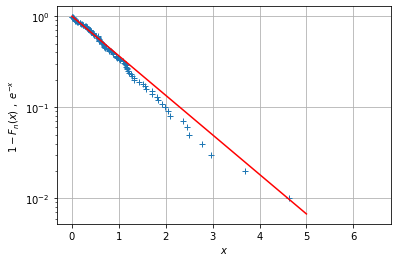

In [198]:
ecdf=ECDF(data3);
plt.plot(ecdf.x,np.ones(len(ecdf.y))-ecdf.y,"+")

#define x and y values to use for CDF
x = np.linspace(0, 5, 500)
y = np.exp(-x)

#plot normal CDF
plt.plot(x, y, color='red')

plt.yscale('log')
plt.ylabel('$1-F_n (x)\ ,\ e^{-x}$')
plt.xlabel(r'$x$')
plt.grid(True)

In [199]:
from scipy.stats import pareto;
data4=pareto.rvs(3, size=100)

Text(0.5, 0, '$x$')

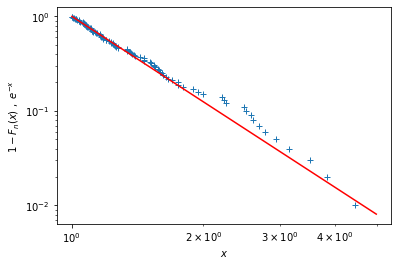

In [200]:
ecdf=ECDF(data4);
plt.plot(ecdf.x,np.ones(len(ecdf.y))-ecdf.y,"+")

#define x and y values to use for CDF
x = np.linspace(1, max(data4), 500)
y = np.power(x,-3)

#plot normal CDF
plt.plot(x, y, color='red')

plt.yscale('log')
plt.xscale('log')
plt.ylabel('$1-F_n (x)\ ,\ e^{-x}$')
plt.xlabel('$x$')

## Histogramme
Histogramme sollten **auschließlich** für diskrete Daten verwendet werden, denn verschiedene Datenpunkte in einer Säule zusammenzufassen ("Binning") vernichtet Information!  
Sei $\Pi =\big( I_j =[z_j ,z_{j+1} ):j=1,\ldots ,k\big)$ eine Partition des Intervalls $[z_1 ,z_{k+1} )$, das alle Datenpunkte der Stichprobe $X=(X_1 ,\ldots ,X_n )$ enthält. Dann ist das **(Stichproben-)Histogramm** gegeben durch
$$
H_n :\mathbb{R}\to\mathbb{N}_0\quad\mbox{mit}\quad H_n (x):=\sum_{j=1}^k \Big(\sum_{i=1}^n\mathbb{1}_{I_k} (X_i)\Big) \mathbb{1}_{I_k} (x)\ .
$$
Typischerweise sind Histogramme nicht normiert, können also nur mit einem Vielfachen der Zähldichte von $X$ verglichen werden.

In [114]:
from math import factorial

def factorialize(nums):
    """ Return factorials of a list of numbers. """

    return [factorial(num) for num in nums]

In [201]:
aa=2;
data5=np.random.poisson(aa,100)

Text(0.5, 0, '$x$')

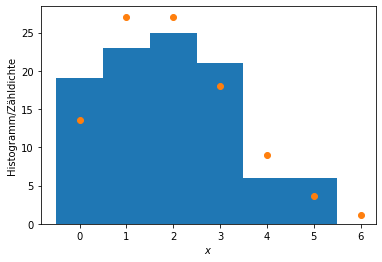

In [204]:
x = list(range(0,max(data5)+2))
plt.hist(data5,bins=(x-0.5*np.ones(len(x))))   #specify bins and shift by -0.5

#define x and y values to use for CDF
y = 100*np.power(aa,x)*math.exp(-aa)/factorialize(x)

#plot normal CDF
plt.plot(x, y,"o")
plt.ylabel('Histogramm/Zähldichte')
plt.xlabel('$x$')

## Kerndichteschätzer
Wenn kontinuierliche Daten unbedingt mit der Dichtefunktion verglichen werden müssen, dann ist ein **Kerndichteschätzer** meistens eine bessere Wahl als ein Histogramm. Wir betrachten hier nur den Gaußkern, d.h. $\phi (t)=\frac{1}{2\pi} e^{-t^2 /2}$, für andere Kerne siehe z.B. https://de.wikipedia.org/wiki/Kerndichteschätzer.  
Der **Kerndichteschätzer** $f_n :\mathbb{R}\to [0,\infty )$ für eine Stichprobe $X$ mit **Bandbreite** $h>0$ ist dann definiert als
$$
f_n (t)=\frac{1}{nh}\sum_{i=1}^n \phi\big( (t-X_i )/h\big)
$$
und entspricht einer "empirischen Dichtefunktion", einer Konvexkombination von Gaußdichten zentriert an den Datenpunkten mit Standardabweichung $h$. 

Text(0.5, 0, '$x$')

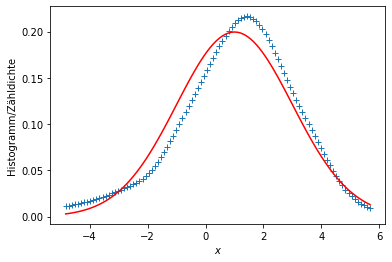

In [211]:
kde = ss.gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 100)
y = kde(x)
z = ss.norm.pdf((x-1)/2)/2

plt.plot(x, y,"+")
plt.plot(x, z, color='red')
plt.ylabel('Histogramm/Zähldichte')
plt.xlabel('$x$')